In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
            
import matplotlib.patches as mpatches

import math
import ast

plt.style.use('default')
plt.rcParams["font.family"] = "Helvetica"

df_ebola = pd.read_csv('ebola.csv')
df_h1n1 = pd.read_csv('h1n1.csv')
df_mers = pd.read_csv('mers_cov.csv')
df_sars = pd.read_csv('sars_cov1.csv')
df_measles = pd.read_csv('measles.csv')
df_polio = pd.read_csv('polio.csv')

df_ebola['disease'] = 'ebola'
df_h1n1['disease'] = 'h1n1'
df_mers['disease'] = 'mers_cov'
df_sars['disease'] = 'sars'
df_measles['disease'] = 'measles'
df_polio['disease'] = 'polio'
df_polio = df_polio.rename(columns={'infection_incidence_count (wild)': 'infection_incidence_count',\
                                    'vaccination_licensed':'licensed_vaccine'})
df_sars = df_sars.rename(columns={'infection_incidence_count (wild)': 'infection_incidence_count',\
                                    'vaccination_licensed':'licensed_vaccine'})
df_mers = df_mers.rename(columns={'infection_incidence_count (wild)': 'infection_incidence_count',\
                                    'vaccination_licensed':'licensed_vaccine'})
df_ebola = df_ebola.rename(columns={'declared_pandemic_outbreak': 'declared_pandemic'})
frames = [df_ebola, df_mers, df_measles, df_polio]

#concatenate dataframes
df_disease = pd.concat(frames, sort=True)
years = df_disease['year'].unique().tolist()
years.sort()
years = years[-21:]
diseases = df_disease['disease'].unique().tolist()
df_disease.keys()
diseases, years

(['ebola', 'mers_cov', 'measles', 'polio'],
 [2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020])

# Test plot
dot plot: https://stackoverflow.com/questions/49703938/how-to-create-a-dot-plot-in-matplotlib-not-a-scatter-plot

/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6652: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
findfont: Font family ['LemonMilk'] not found. Falling back to DejaVu Sans.


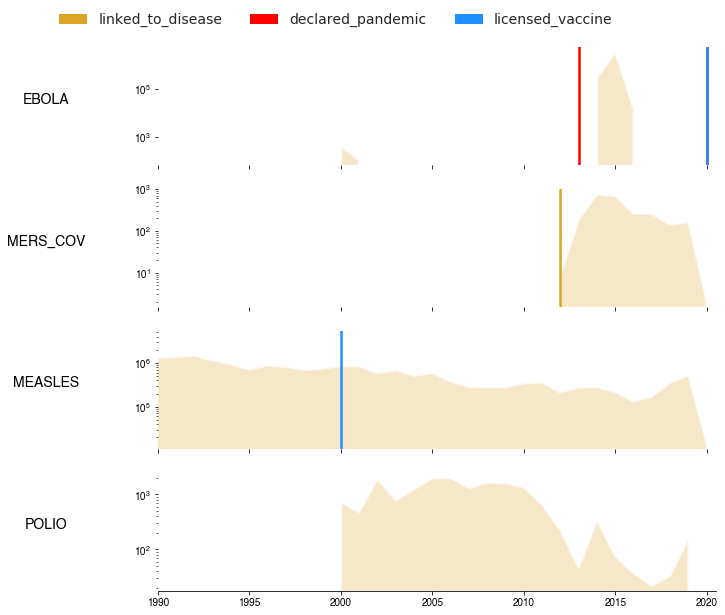

In [2]:
# diseases.insert(0, '')
# diseases.append('null')
fig, axs = plt.subplots(len(diseases), 1, figsize=(10, 10), sharex=True)
plt.style.use('seaborn')
plt.rcParams["font.family"] = "LemonMilk"
dates = {'linked_to_disease': 'goldenrod', 'declared_pandemic':'red', 'licensed_vaccine':'dodgerblue'}
# fig.subplots_adjust(hspace=-.5)
# fig.subplots_adjust(hspace=-.1)

for i, df in enumerate(frames):
    # sample = df.dropna(subset=['infection_incidience_count'])
    sample = axs[i].fill_between(df['year'], df['infection_incidence_count'], fc='wheat', \
                                 ec='white', linewidth=2.5, alpha=0.7)
    limits = [0, math.ceil(df['infection_incidence_count'].max()/10) * 10]
    axs[i].set_xlim([1990, 2020.5])
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    
    if diseases[i] != 'polio': axs[i].spines['bottom'].set_visible(False)
    title = diseases[i].upper()
    axs[i].set_ylabel(title, rotation='horizontal', size=14, fontweight='bold')
    axs[i].yaxis.set_label_coords(-0.2,0.5)
    axs[i].set_yscale('log')
    
    
    for date in dates:
        sample = df[df[date] == True]
        for r, row in sample.iterrows():
            color = dates[date]
            axs[i].axvline(row['year'], limits[0], limits[1], c=color, label=date, linewidth=2.5)

patches = []
text = []
for date in dates:
    text.append(date)
    patches.append(mpatches.Rectangle((0,0),1,1, fc=dates[date]))

plt.legend(patches, text, bbox_to_anchor=(-0.2, 5), fontsize=14, facecolor='white', ncol=3)

fig.savefig('testfig.png',bbox_inches='tight')

## Ridgeplots

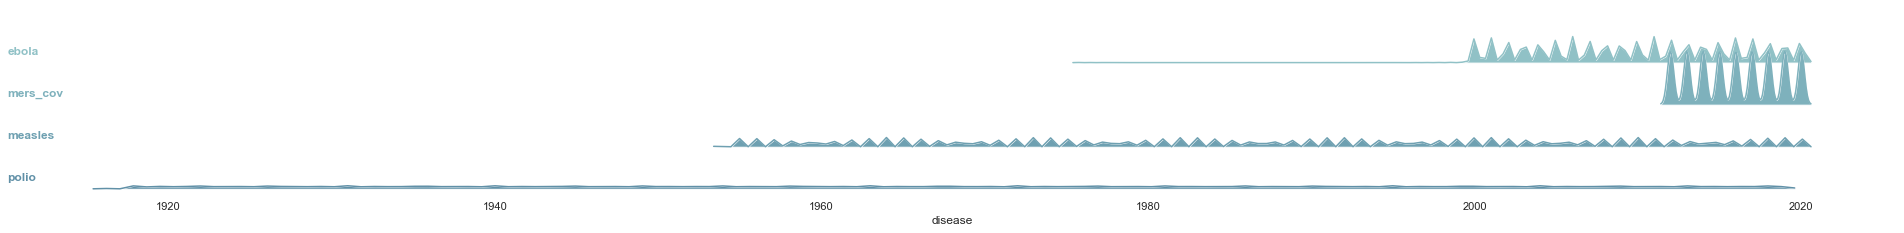

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# # Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_disease, row="disease", hue="disease", aspect=30, height=.9, palette=pal)

# # # Draw the densities in a few steps
g.map(sns.kdeplot, 'year', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)

# # Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "disease")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


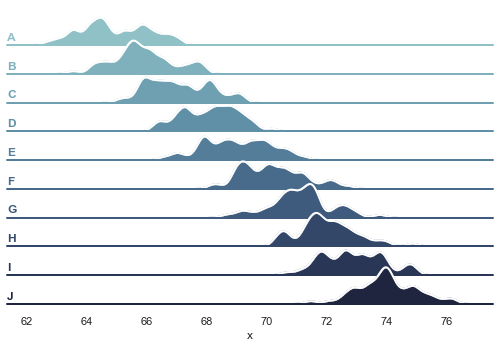

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# # Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# # Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [5]:
from vega_datasets import data

source = data.movies.url

alt.Chart(source).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [6]:
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
chart = alt.Chart(data)
alt.Chart(data).mark_point()

alt.Chart(...)

In [7]:
alt.Chart(data).mark_point().encode(
    x='a',
)

alt.Chart(...)

In [8]:
df_covid_death = pd.read_csv('time_series_covid19_deaths_global.csv')
df_covid_conf = pd.read_csv('time_series_covid19_confirmed_global.csv')

df_covid_death_sg = df_covid_death[df_covid_death['Country/Region'] == 'Singapore']
df_covid_conf_sg = df_covid_conf[df_covid_conf['Country/Region'] == 'Singapore']
len(df_covid_conf_sg)
del df_covid_death_sg['Province/State']
del df_covid_conf_sg['Province/State']

In [9]:
df_covid_death_sg = df_covid_death_sg.melt(id_vars=["Country/Region", "Lat", "Long"], 
        var_name="Date", 
        value_name="deaths")

df_covid_conf_sg = df_covid_conf_sg.melt(id_vars=["Country/Region", "Lat", "Long"], 
        var_name="Date", 
        value_name="incidence")

df_covid_conf_sg = df_covid_conf_sg.reset_index()
df_covid_death_sg = df_covid_death_sg.reset_index()

In [10]:
from datetime import datetime
df_covid_conf_sg['strpdate'] = df_covid_conf_sg.apply(lambda row: datetime.strptime(row['Date'], '%m/%d/%y'), axis=1)
sample_covid=[i.to_pydatetime() for i in df_covid_conf_sg['strpdate'].tolist()]

df_covid_death_sg['strpdate'] = df_covid_conf_sg.apply(lambda row: datetime.strptime(row['Date'], '%m/%d/%y'), axis=1)
sample_covid_death=[i.to_pydatetime() for i in df_covid_death_sg['strpdate'].tolist()]

In [11]:
len(df_covid_death_sg), len(df_covid_conf_sg)

(90, 90)

In [12]:
df_sars_clean = pd.read_csv('sars_2003_complete_dataset_clean.csv')
df_sg = df_sars_clean[df_sars_clean['Country'] == 'Singapore']
df_sg = df_sg.reset_index()
del df_sg['index']
df_sg['strpdate'] = df_sg.apply(lambda row: datetime.strptime(row['Date'], '%Y-%m-%d'), axis=1)
df_sg['year'] = df_sg.apply(lambda row: row['strpdate'].year, axis=1)
# df_sg['monthdate'] = df_sg.apply(lambda row: row['strpdate'].monthdate, axis=1)
df_sg['month'] = df_sg.apply(lambda row: row['strpdate'].month, axis=1)
df_sg['day'] = df_sg.apply(lambda row: row['strpdate'].day, axis=1)
df_sg['datetime'] = df_sg.apply(lambda row: row['strpdate'].to_pydatetime(), axis=1)

df_sg = df_sg.rename(columns={'Cumulative number of case(s)': 'incidence',\
                                    'Number of deaths':'deaths'})
sample_sars=[i.to_pydatetime() for i in df_sg['strpdate'].tolist()]
type(sample_sars[0])

datetime.datetime

findfont: Font family ['LemonMilk'] not found. Falling back to DejaVu Sans.
findfont: Font family ['LemonMilk'] not found. Falling back to DejaVu Sans.


Text(0, 0, '')


findfont: Font family ['LemonMilk'] not found. Falling back to DejaVu Sans.


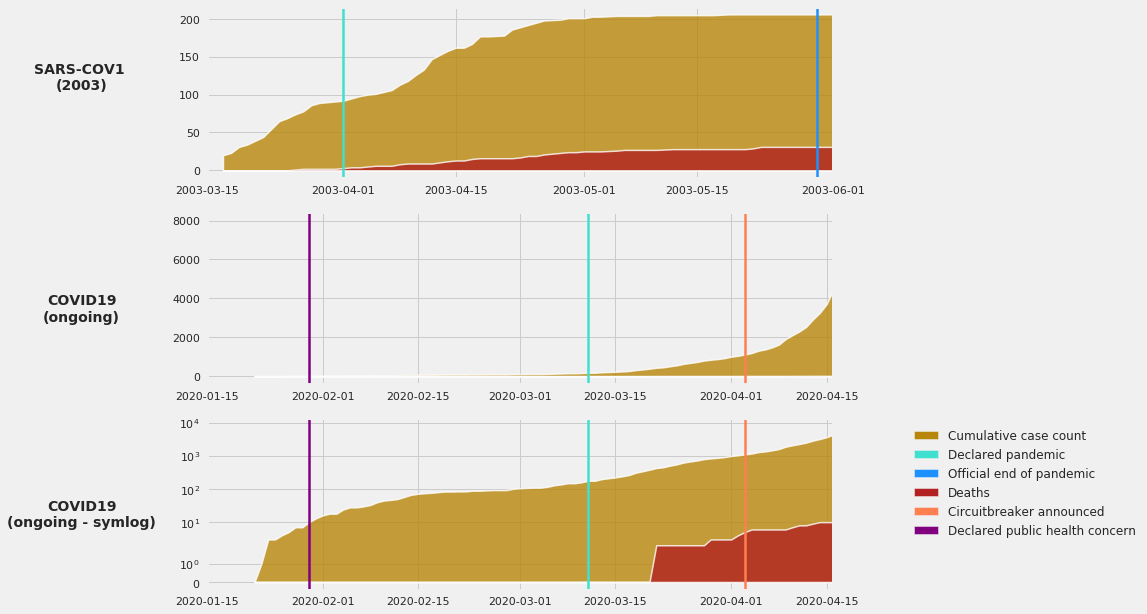

<Figure size 576x396 with 0 Axes>

In [13]:
plt.style.use('fivethirtyeight')
plt.rcParams["font.family"] = "LemonMilk"

fig, axs = plt.subplots(3, 1, figsize=(10, 10))

axs[0].fill_between(sample_sars, df_sg['incidence'], ec='white', facecolor="darkgoldenrod", \
                    linewidth=1.5, alpha=0.8)
axs[0].fill_between(sample_sars, df_sg['deaths'], ec='white', facecolor="firebrick", \
                     linewidth=1.5, alpha=0.8)
axs[0].set_xlim(['2003-03-15', '2003-06-01'])
axs[0].axvline('2003-05-30', 0, 206, c='dodgerblue', label=date, linewidth=2.5)
axs[0].axvline('2003-04-01', 0, 206, c='turquoise', label=date, linewidth=2.5)
axs[0].yaxis.set_label_coords(-0.2,0.5)
axs[0].set_ylabel('SARS-COV1 \n(2003)', rotation='horizontal', size=14, fontweight='bold')
# axs[0].set_yscale('symlog')

axs[1].fill_between(sample_covid, df_covid_conf_sg['incidence'], ec='white', facecolor="darkgoldenrod", \
                    linewidth=1.5, alpha=0.8)
axs[1].fill_between(sample_covid_death, df_covid_death_sg['deaths'], ec='white', facecolor="firebrick", \
                    linewidth=1.5, alpha=0.8)
axs[1].yaxis.set_label_coords(-0.2,0.35)
axs[1].set_ylabel('COVID19\n(ongoing)', rotation='horizontal', size=14, fontweight='bold')
axs[1].set_xlim(['2020-01-15', '2020-04-16'])
axs[1].axvline('2020-01-30', c='purple', label=date, linewidth=2.5)
axs[1].axvline('2020-03-11', c='turquoise', label=date, linewidth=2.5)
axs[1].axvline('2020-04-03', 0, 1, c='coral', label='Circuitbreaker announced', linewidth=2.5)
# axs[1].set_yscale('symlog')


axs[2].fill_between(sample_covid, df_covid_conf_sg['incidence'], ec='white', facecolor="darkgoldenrod", \
                    linewidth=1.5, alpha=0.8)
axs[2].fill_between(sample_covid_death, df_covid_death_sg['deaths'], ec='white', facecolor="firebrick", \
                    linewidth=1.5, alpha=0.8)
axs[2].yaxis.set_label_coords(-0.2,0.35)
axs[2].set_ylabel('COVID19\n(ongoing - symlog)', rotation='horizontal', size=14, fontweight='bold')
axs[2].set_xlim(['2020-01-15', '2020-04-16'])
axs[2].axvline('2020-01-30', c='purple', label=date, linewidth=2.5)
axs[2].axvline('2020-03-11', c='turquoise', label=date, linewidth=2.5)
axs[2].axvline('2020-04-03', 0, 1, c='coral', label='Circuitbreaker announced', linewidth=2.5)
axs[2].set_yscale('symlog')

print (axs[1].get_yticklabels()[1])

dates = {'Cumulative case count': 'darkgoldenrod',\
         'Declared pandemic':'turquoise',\
         'Official end of pandemic':'dodgerblue',\
         'Deaths': 'firebrick',\
         'Circuitbreaker announced': 'coral',\
         'Declared public health concern': 'purple'
        }
text = []
patches = []
for date in dates:
    text.append(date)
    patches.append(mpatches.Rectangle((0,0),1,1, fc=dates[date]))

plt.legend(patches, text, bbox_to_anchor=(1.5, 1), fontsize=12, facecolor='white')
plt.show()
plt.tight_layout()
fig.savefig('sars_covid19.png')

In [14]:
def case_fatality(deaths, incidence):
    if incidence < 1:
        incidence +=1
    rate = deaths/incidence * 100
    print (deaths, incidence, rate)
    return rate

df_sars = df_sg
df_sars['percent'] = df_sars.apply(lambda row: case_fatality(row['deaths'], row['incidence']), axis=1)
# df_covid = df_covid_conf_sg.join(df_covid_death_sg, on='strpdate')
covid_case = df_covid_conf_sg['incidence'].tolist()
df_covid_death_sg['percent'] = df_covid_death_sg.apply(lambda row: case_fatality(row['deaths'], \
                                                                                 covid_case[row['index']]), axis=1)

0 20 0.0
0 23 0.0
0 31 0.0
0 34 0.0
0 39 0.0
0 44 0.0
0 65 0.0
0 69 0.0
1 74 1.3513513513513513
2 78 2.564102564102564
2 86 2.3255813953488373
2 89 2.247191011235955
2 91 2.197802197802198
3 92 3.260869565217391
4 95 4.2105263157894735
4 98 4.081632653061225
5 100 5.0
6 101 5.9405940594059405
6 106 5.660377358490567
8 113 7.079646017699115
9 118 7.627118644067797
9 126 7.142857142857142
9 133 6.7669172932330826
9 147 6.122448979591836
12 158 7.59493670886076
13 162 8.024691358024691
13 162 8.024691358024691
15 167 8.982035928143713
16 177 9.03954802259887
16 177 9.03954802259887
16 178 8.98876404494382
16 186 8.60215053763441
17 189 8.994708994708994
19 192 9.895833333333332
19 195 9.743589743589745
21 198 10.606060606060606
23 199 11.557788944723619
24 201 11.940298507462686
24 201 11.940298507462686
25 201 12.437810945273633
25 203 12.31527093596059
25 203 12.31527093596059
26 204 12.745098039215685
27 204 13.23529411764706
27 204 13.23529411764706
27 204 13.23529411764706
27 204 13.

In [15]:
dates ={'start_sars': '2003-03-17', 'end_sars': '2003-05-31'} 
covid = {'start_covid': '2020-01-22', \
        'travelban': '2020-3-15', 'dorscon_orange': '2020-02-07' , 'circuitbreaker': '2020-04-07'}
print(df_sars[df_sars['strpdate'] == dates['end_sars']].index) #65
print(df_covid_conf_sg[df_covid_conf_sg['strpdate'] == covid['start_covid']].index) #65
print(df_covid_conf_sg[df_covid_conf_sg['strpdate'] == covid['start_covid']].index) #65
print(df_covid_conf_sg[df_covid_conf_sg['strpdate'] == covid['travelban']].index) #65
print(df_covid_conf_sg[df_covid_conf_sg['strpdate'] == covid['dorscon_orange']].index) #65
print(df_covid_conf_sg[df_covid_conf_sg['strpdate'] == covid['circuitbreaker']].index) #65

Int64Index([65], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([53], dtype='int64')
Int64Index([16], dtype='int64')
Int64Index([76], dtype='int64')


['', '', '', '', '', '', '', '']
['', 'Testing', '', '', '', '', '', '']
[0, 20, 40, 60, 80, 100]


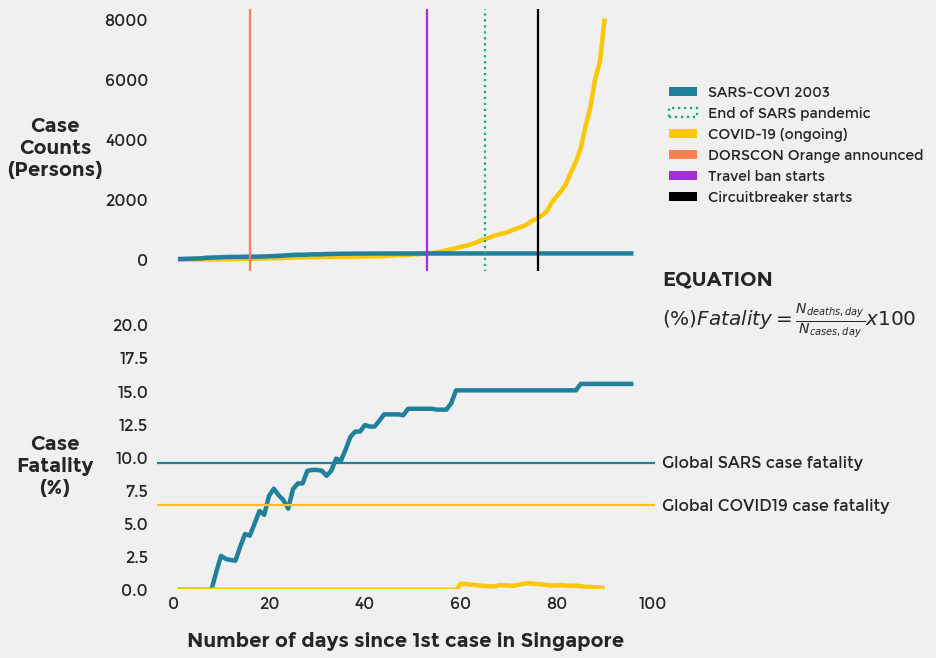

In [17]:
plt.rcParams["font.family"] = "Montserrat"

fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=True)
days_covid = [(i+1) for i in range(len(df_covid_conf_sg['incidence']))]
days_sars = [(i+1) for i in range(len(df_sg['incidence']))]
alpha = 1
titlesize = 20
linewidth = 2.25
mainlinewidth=linewidth*2
colors = {'SARS-COV1 2003': '#21819d', 'End of SARS pandemic': '#14b067',\
          'COVID-19 (ongoing)': '#fcc609', 'DORSCON Orange announced': 'coral', \
          'Travel ban starts': '#a22ed8',  'Circuitbreaker starts': 'black'}
bckgrd = '#bcc8cc'

linestyles ={'End of SARS pandemic' : ':'}

axs[0].plot(days_covid, df_covid_conf_sg['incidence'], color=colors['COVID-19 (ongoing)'], \
                    linewidth=mainlinewidth, alpha=alpha)
axs[0].yaxis.set_label_coords(-0.2,0.35)
axs[0].set_ylabel('Case\nCounts\n(Persons)', rotation='horizontal', size=titlesize, fontweight='bold')

axs[0].plot(days_sars, df_sg['incidence'], color=colors['SARS-COV1 2003'], \
                    linewidth=mainlinewidth, alpha=alpha)

axs[1].yaxis.set_label_coords(-0.2,0.35)
axs[1].set_ylabel('Case\nFatality\n(%)', rotation='horizontal', size=titlesize, fontweight='bold')
axs[1].set_xlabel('Number of days since 1st case in Singapore', size=titlesize, fontweight='bold', labelpad=20)
axs[1].set_ylim([0, 20])

days_covid_death = [(i+1) for i in range(len(df_covid_death_sg['deaths']))]
axs[1].plot(days_sars, df_sg['percent'], color=colors['SARS-COV1 2003'], \
                    linewidth=mainlinewidth, alpha=alpha)
axs[1].plot(days_covid_death, df_covid_death_sg['percent'], color=colors['COVID-19 (ongoing)'], \
                    linewidth=mainlinewidth, alpha=alpha)

axs[1].axhline(6.4, 0, 90, c=colors['COVID-19 (ongoing)'], label=date, linewidth=linewidth)
axs[1].axhline(9.6, 0, 90, c=colors['SARS-COV1 2003'], label=date, linewidth=linewidth)

axs[0].axvline(65, 0, 100, c=colors['End of SARS pandemic'], label=date, linewidth=linewidth, linestyle=':')
# axs[1].axvline(65, 0, 100, c=colors['End of SARS pandemic'], label=date, linewidth=linewidth, linestyle=':')

# axs[1].set_xticklabels([i * 20 for i in range(6)])
labels = [item.get_text() for item in axs[1].get_xticklabels()]
print(labels)
labels[1] = 'Testing'
print (labels)
newLabels = [i*20 for i in range(6)]
print(newLabels)
axs[1].set_xticks(newLabels)

axs[1].grid(False)
axs[0].grid(False)

textpt = 102
axs[1].text(textpt, 9.2, 'Global SARS case fatality', fontweight='light', fontsize=titlesize-4)
axs[1].text(textpt, 6.0, 'Global COVID19 case fatality', fontweight='light', fontsize=titlesize-4)
# axs[1].text(textpt, 18, 'EQUATION:\nCase fatality rate_i \n= Number of deaths_i / Number of cases_i * 100')
axs[1].text(textpt, 23, 'EQUATION', fontweight='bold', fontsize=titlesize)
axs[1].text(textpt, 20, r'$(\%) Fatality = \frac{N_{deaths, day}}{N_{cases, day}} x 100$', fontsize=titlesize)

for ax in axs:
    ax.tick_params('both', labelsize=titlesize/1.25)
    
axs[0].axvline(16, 0, 100, c=colors['DORSCON Orange announced'], label=date, linewidth=linewidth, linestyle='-')
axs[0].axvline(53, 0, 100, c=colors['Travel ban starts'], label=date, linewidth=linewidth, linestyle='-')
axs[0].axvline(76, 0, 100, c=colors['Circuitbreaker starts'], label=date, linewidth=linewidth, linestyle='-')

text = []
patches = []
for color in colors:
    text.append(color)
    linestyle='-'
    ec='none'
    fc=colors[color]
    if 'End' in color:
        linestyle=linestyles[color]
        fc='none'
        ec=colors[color]
    patches.append(mpatches.Patch(ec=ec, fc=fc, linestyle=linestyle, linewidth=linewidth))

axs[0].legend(patches, text, bbox_to_anchor=(1.0,0.75), fontsize=14, ncol=1)
fig.savefig('sars_covid19_200420.png', bbox_inches = 'tight')